# **Análise Exploratória de Dados**

### **Perguntas:**

Número de competidores/duplas

Classes de vela extraídas

Competições extraídas

Número de competições por classe
  
Média de competidores por classe

Número de competidores por competição

Número de classes por competição

Média de regatas por classe

Média de regatas por classe em cada evento (evento ignora o ano)

Média de competidores por evento (evento ignora o ano)

Distribuição das punições

Distribuição das punições por classe

Distribuição das punições por evento

Competidores que mais participaram / menos participaram de competições

Competidores mais punidos em média

Competidores que mais variaram de classe

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('../data/final_data.xlsx', index_col=0)

## **Informações gerais do dataset**

In [3]:
df.head()

,ID Resultado,ID Competidor,Nome Competidor,ID Competição,Classe Vela,Pontuação Regata,Descarte,Flotilha,Posição Geral,Punição,Pontuação Total,Nett,Nome Competição
0,NaN,NaN,ALEJANDRO CLOOS,2.0,Ilca 7,24,0.0,GERAL,19,NaN,205.0,174,Central and South American Championship 2022
1,NaN,NaN,ALEJANDRO CLOOS,2.0,Ilca 7,18,0.0,GERAL,19,NaN,205.0,174,Central and South American Championship 2022
2,NaN,NaN,ALEJANDRO CLOOS,2.0,Ilca 7,20,0.0,GERAL,19,NaN,205.0,174,Central and South American Championship 2022
3,NaN,NaN,ALEJANDRO CLOOS,2.0,Ilca 7,22,0.0,GERAL,19,NaN,205.0,174,Central and South American Championship 2022
4,NaN,NaN,ALEJANDRO CLOOS,2.0,Ilca 7,24,0.0,GERAL,19,NaN,205.0,174,Central and South American Championship 2022


In [4]:
print("O DataFrame contém {} entradas com {} colunas".format(df.shape[0], df.shape[1]))

O DataFrame contém 135635 entradas com 13 colunas


In [5]:
print("As colunas são: {}".format(df.columns.values))

As colunas são: ['ID Resultado' 'ID Competidor' 'Nome Competidor' 'ID Competição'
 'Classe Vela' 'Pontuação Regata' 'Descarte' 'Flotilha' 'Posição Geral'
 'Punição' 'Pontuação Total' 'Nett' 'Nome Competição']


In [6]:
competidores = np.unique(df['Nome Competidor'])
print("No total, há {} competidores ou duplas".format(len(competidores)))

No total, há 3159 competidores ou duplas


In [7]:
classes = df['Classe Vela'].unique().tolist()
print("As classes de vela extraídas para análise foram: {}".format(classes))

As classes de vela extraídas para análise foram: ['Ilca 7', 'Ilca 6', 'Formula Kite Fem.', 'Formula Kite Masc.', 'IQFOIL Masc.', 'IQFOIL Fem.', '49er', '49erFX', 'Nacra 17', '470']


In [8]:
competicoes = df['Nome Competição'].unique().tolist()
print("As competições extraídas para análise foram: {}".format(competicoes))

As competições extraídas para análise foram: ['Central and South American Championship 2022', 'Central and South American Championship 2023', 'European Championship 2021', 'European Championship 2022', 'European Championship 2023', 'Semaine Olympique Francaise De Voile 2015', 'Semaine Olympique Francaise De Voile 2016', 'Semaine Olympique Francaise De Voile 2022', 'Semaine Olympique Francaise De Voile 2023', 'Trofeo S.A.R Princesa Sofia 2015', 'Trofeo S.A.R Princesa Sofia 2016', 'Trofeo S.A.R Princesa Sofia 2019', 'Trofeo S.A.R Princesa Sofia 2022', 'Trofeo S.A.R Princesa Sofia 2023', 'World Championship 2021', 'World Championship 2022', 'World Championship 2023', 'World Championship 2015', 'World Championship 2016', 'World Championship 2017', 'World Championship 2019', 'World Championship 2020', 'Semaine Olympique Francaise De Voile 2018', 'Semaine Olympique Francaise De Voile 2017', 'World Championship 2018', 'Central and South American Championship 2021', 'Trofeo S.A.R Princesa Sofi

### **Número de competições por classe**

In [9]:
competitions_by_class = df.groupby('Classe Vela')['ID Competição']\
                          .nunique()\
                          .sort_values(ascending=False)\
                          .reset_index(name='Número de Competições')

competitions_by_class

,Classe Vela,Número de Competições
0,49er,27
1,Ilca 6,27
2,Ilca 7,27
3,49erFX,25
4,470,7
5,IQFOIL Fem.,7
6,IQFOIL Masc.,7
7,Nacra 17,7
8,Formula Kite Fem.,6
9,Formula Kite Masc.,6


### **Média de competidores por classe em competições**

In [10]:
competitors_by_class_and_competition = df.groupby(['Classe Vela', 'ID Competição'])['Nome Competidor']\
                                         .nunique()\
                                         .sort_values(ascending=False)

mean_ncompetitors_by_class = competitors_by_class_and_competition.groupby('Classe Vela')\
                                                                 .mean()\
                                                                 .sort_values(ascending=True)\
                                                                 .reset_index(name="Média de Competidores")

mean_ncompetitors_by_class

,Classe Vela,Média de Competidores
0,Nacra 17,37.285714
1,49erFX,41.240000
2,Formula Kite Fem.,47.500000
3,470,60.857143
4,49er,64.259259
5,IQFOIL Fem.,75.142857
6,Ilca 6,86.000000
7,Formula Kite Masc.,90.000000
8,IQFOIL Masc.,105.428571
9,Ilca 7,120.629630


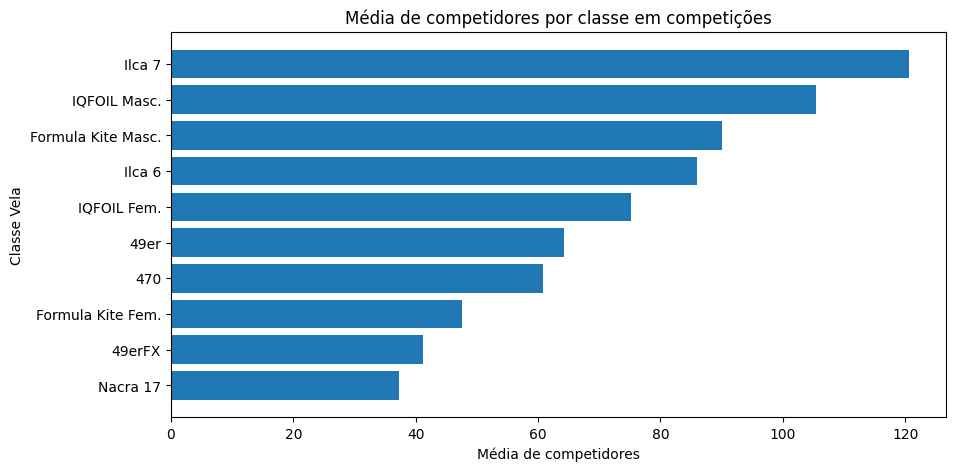

In [11]:
#plots the data above
plt.figure(figsize=(10,5))
plt.barh(mean_ncompetitors_by_class['Classe Vela'], mean_ncompetitors_by_class['Média de Competidores'])
plt.title('Média de competidores por classe em competições')
plt.xlabel('Média de competidores')	
plt.ylabel('Classe Vela')
plt.show()

### **Número de competidores por competição**

In [12]:
competitors_by_competition = df.groupby('Nome Competição')['Nome Competidor']\
                               .nunique()\
                               .reset_index(name='Número de Competidores')\
                               .sort_values(by='Número de Competidores', ascending=False)

competitors_by_competition.head()

,Nome Competição,Número de Competidores
22,Trofeo S.A.R Princesa Sofia 2023,976
31,World Championship 2023,816
8,European Championship 2022,796
30,World Championship 2022,672
15,Semaine Olympique Francaise De Voile 2023,666


### **Número de classes por competição**

In [13]:
classes_by_competition = df.groupby('Nome Competição')['Classe Vela']\
                            .nunique()\
                            .reset_index(name='Número de Classes')\
                            .sort_values(by='Número de Classes', ascending=False)

classes_by_competition.head()

,Nome Competição,Número de Classes
31,World Championship 2023,10
15,Semaine Olympique Francaise De Voile 2023,10
14,Semaine Olympique Francaise De Voile 2022,10
22,Trofeo S.A.R Princesa Sofia 2023,10
8,European Championship 2022,9


### **Média de regatas por classe**

In [14]:
# pego o numero de regatas por competidor
nregatas_por_competidor = df.groupby(['Nome Competidor', 'Classe Vela', 'Nome Competição'])['Nome Competidor'].count().reset_index(name='Número de Regatas')

# pego o numero maximo de regatas (competidor que correu todas)
max_regatas = nregatas_por_competidor.groupby(['Nome Competição', 'Classe Vela'])['Número de Regatas'].max().reset_index(name='Número de Regatas')

max_regatas.head()

,Nome Competição,Classe Vela,Número de Regatas
0,Central and South American Championship 2021,Ilca 6,8
1,Central and South American Championship 2021,Ilca 7,8
2,Central and South American Championship 2022,Ilca 6,10
3,Central and South American Championship 2022,Ilca 7,10
4,Central and South American Championship 2023,Ilca 6,9


In [15]:
media_regatas_por_classe = max_regatas.groupby('Classe Vela')['Número de Regatas'].mean().reset_index(name='Média de Regatas').sort_values(by='Média de Regatas', ascending=True)

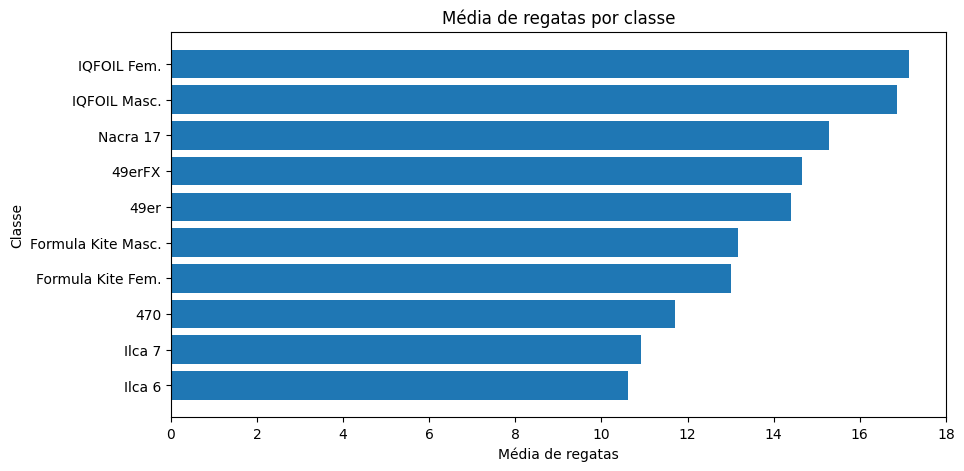

In [16]:
#plots the data above
plt.figure(figsize=(10,5))
plt.barh(media_regatas_por_classe['Classe Vela'], media_regatas_por_classe['Média de Regatas'])
plt.title('Média de regatas por classe em competições')
plt.xlabel('Média de regatas')	
plt.ylabel('Classe')
plt.show()

### **Média de regatas por classe em cada evento**

In [17]:
dfProv = df.copy()

#competição sem ano (sem os ultimos 4 caracteres)
dfProv['Evento'] = dfProv['Nome Competição'].str[:-5]

In [18]:
dfProv.head()

,ID Resultado,ID Competidor,Nome Competidor,ID Competição,Classe Vela,Pontuação Regata,Descarte,Flotilha,Posição Geral,Punição,Pontuação Total,Nett,Nome Competição,Evento
0,NaN,NaN,ALEJANDRO CLOOS,2.0,Ilca 7,24,0.0,GERAL,19,NaN,205.0,174,Central and South American Championship 2022,Central and South American Championship
1,NaN,NaN,ALEJANDRO CLOOS,2.0,Ilca 7,18,0.0,GERAL,19,NaN,205.0,174,Central and South American Championship 2022,Central and South American Championship
2,NaN,NaN,ALEJANDRO CLOOS,2.0,Ilca 7,20,0.0,GERAL,19,NaN,205.0,174,Central and South American Championship 2022,Central and South American Championship
3,NaN,NaN,ALEJANDRO CLOOS,2.0,Ilca 7,22,0.0,GERAL,19,NaN,205.0,174,Central and South American Championship 2022,Central and South American Championship
4,NaN,NaN,ALEJANDRO CLOOS,2.0,Ilca 7,24,0.0,GERAL,19,NaN,205.0,174,Central and South American Championship 2022,Central and South American Championship


In [19]:
# pego o numero de regatas por competidor
nregatas_por_competidor = dfProv.groupby(['Nome Competidor', 'Classe Vela', 'Nome Competição', 'Evento'])['Nome Competidor'].count().reset_index(name='Número de Regatas')

# pego o numero maximo de regatas (competidor que correu todas)
max_regatas = nregatas_por_competidor.groupby(['Nome Competição', 'Classe Vela', 'Evento'])['Número de Regatas'].max().reset_index(name='Número de Regatas')

# faço a média de regatas por evento
media_regatas_classe_evento = max_regatas.groupby(['Classe Vela', 'Evento'])['Número de Regatas'].mean().reset_index(name='Média de Regatas')

media_regatas_classe_evento.head()

,Classe Vela,Evento,Média de Regatas
0,470,European Championship,12.000000
1,470,Semaine Olympique Francaise De Voile,10.500000
2,470,Trofeo S.A.R Princesa Sofia,11.000000
3,470,World Championship,13.000000
4,49er,European Championship,14.166667


In [20]:
eventos = media_regatas_classe_evento['Evento'].unique().tolist()

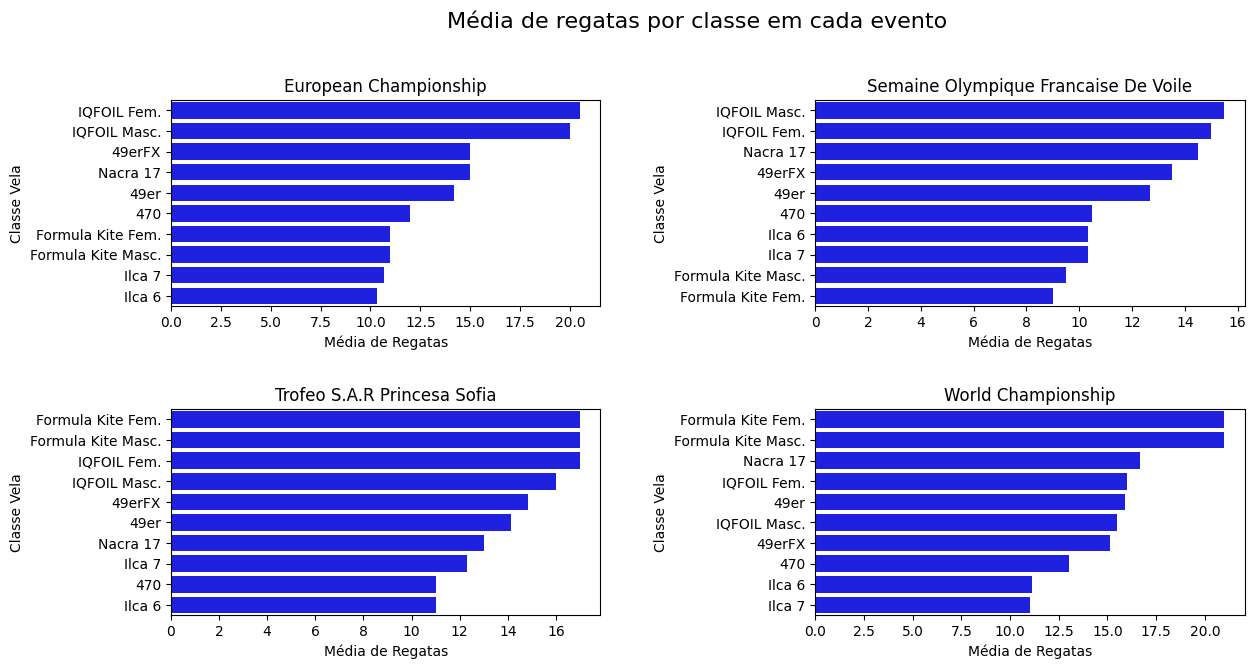

In [21]:
# Classe Vela in different subplots, Punicao in x axis and freq in y axis
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12,10))
fig.suptitle('Média de regatas por classe em cada evento', fontsize=16)
fig.tight_layout(pad=3.0)
for i, evento in enumerate(eventos):
    ax = axes[i//2, i%2]
    ax.set_title(evento)
    ax.set_xlabel('Punição')
    ax.set_ylabel('Porcentagem (%)')
    # horizontal bar plot
    sns.barplot(x='Média de Regatas', y='Classe Vela', 
                data=media_regatas_classe_evento[media_regatas_classe_evento['Evento']==evento].sort_values(by='Média de Regatas', ascending=False),
                ax=ax,
                color='blue')
    
# increase space between subplots
fig.subplots_adjust(hspace=0.5, wspace=0.5)

# delete the last subplot
fig.delaxes(axes[2,0])
fig.delaxes(axes[2,1])
    
plt.show()

### **Média de competidores por Evento (ignorando o ano)**

In [22]:
#groups the data per class and then per competition and then counts the unique competitors
competitors_by_class_and_event = dfProv.groupby(['Evento', 'ID Competição'])['Nome Competidor']\
                                       .nunique()\
                                       .sort_values(ascending=False)

#now takes the mean inside each class
mean_ncompetitors_by_class = competitors_by_class_and_event.groupby('Evento')\
                                                           .mean()\
                                                           .sort_values(ascending=True)\
                                                           .reset_index(name="Média de Competidores")

mean_ncompetitors_by_class

,Evento,Média de Competidores
0,Central and South American Championship,112.333333
1,European Championship,302.285714
2,Semaine Olympique Francaise De Voile,317.666667
3,World Championship,431.000000
4,Trofeo S.A.R Princesa Sofia,475.666667


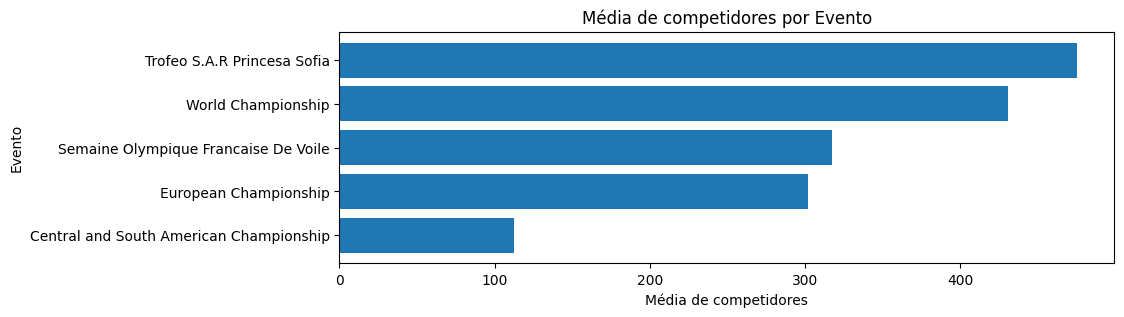

In [23]:
#plots the data above
plt.figure(figsize=(10,3))
plt.barh(mean_ncompetitors_by_class['Evento'], mean_ncompetitors_by_class['Média de Competidores'])
plt.title('Média de competidores por Evento')
plt.xlabel('Média de competidores')	
plt.ylabel('Evento')
plt.show()

### **Distribuição das punições**

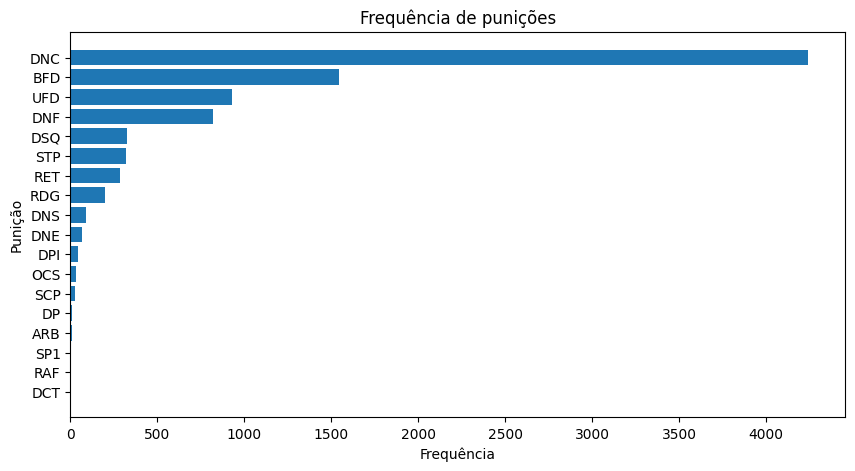

In [24]:
#show the frequency of each punishment
punicao = df['Punição'].value_counts().sort_values(ascending=True)

#plots the data above
plt.figure(figsize=(10,5))
plt.title('Frequência de punições')
plt.xlabel('Frequência')
plt.ylabel('Punição')
plt.barh(punicao.index, punicao.values)
plt.show()

### **Distribuição das punições por classe**

In [25]:
npunicoes_por_classe = df.groupby(['Classe Vela', 'Punição'])['Punição'].count().sort_values(ascending=False).reset_index(name='Frequência')
npunicoes_por_classe.head()

,Classe Vela,Punição,Frequência
0,Ilca 7,DNC,827
1,49er,DNC,799
2,Ilca 7,BFD,556
3,Formula Kite Masc.,DNC,540
4,Ilca 6,DNC,530


In [26]:
total_punicoes_por_classe = df.groupby(['Classe Vela'])['Punição'].count().sort_values(ascending=False).reset_index(name='Total de Punições')
total_punicoes_por_classe.head()

,Classe Vela,Total de Punições
0,Ilca 7,2036
1,49er,1689
2,Ilca 6,1245
3,49erFX,975
4,IQFOIL Masc.,963


In [27]:
npunicoes_por_classe = npunicoes_por_classe.merge(total_punicoes_por_classe, on='Classe Vela')
npunicoes_por_classe['Porcentagem'] = (npunicoes_por_classe['Frequência'] / npunicoes_por_classe['Total de Punições']) * 100

In [28]:
npunicoes_por_classe.head()

,Classe Vela,Punição,Frequência,Total de Punições,Porcentagem
0,Ilca 7,DNC,827,2036,40.618861
1,Ilca 7,BFD,556,2036,27.308448
2,Ilca 7,UFD,200,2036,9.823183
3,Ilca 7,STP,134,2036,6.581532
4,Ilca 7,DNF,99,2036,4.862475


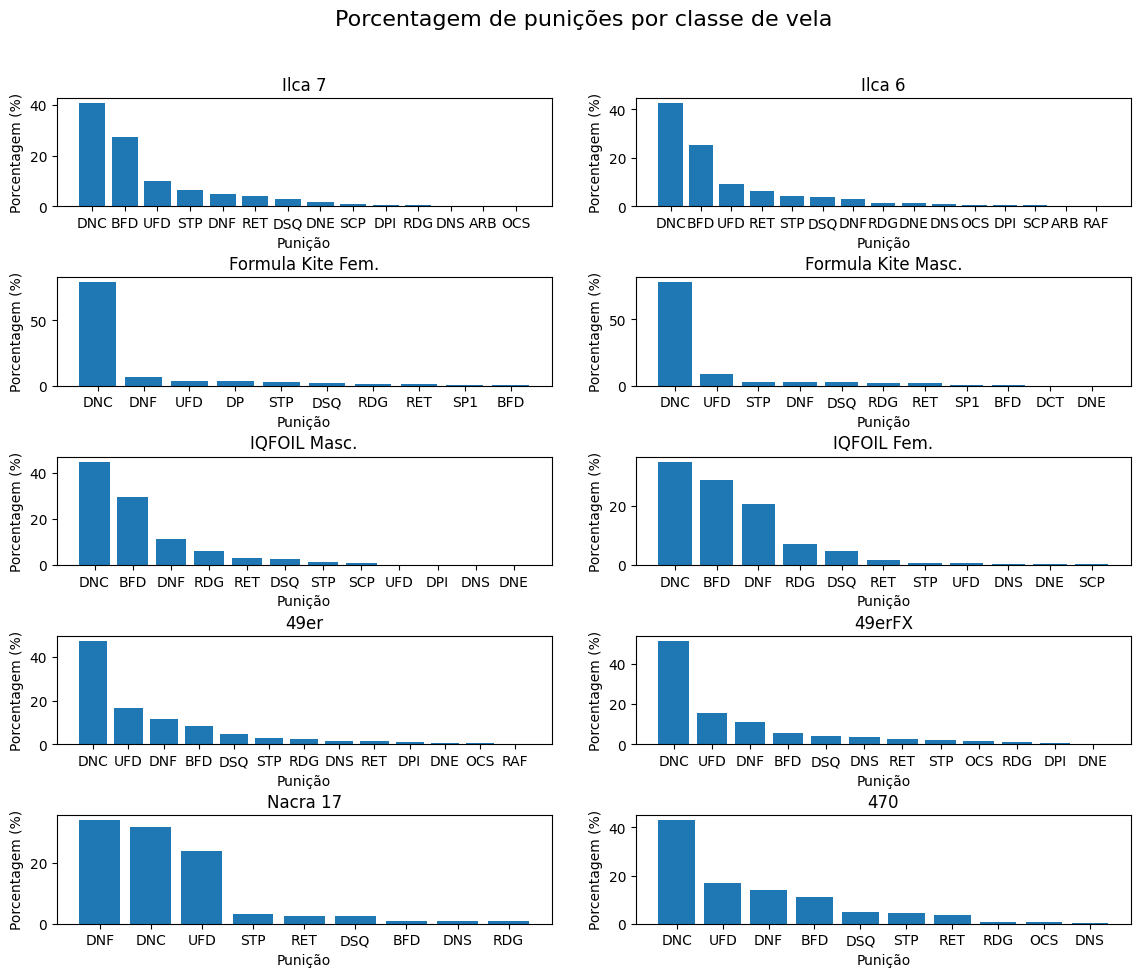

In [29]:
# Classe Vela in different subplots, Punicao in x axis and freq in y axis
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(12,10))
fig.subplots_adjust(hspace=1)
fig.suptitle('Porcentagem de punições por classe de vela', fontsize=16)
fig.tight_layout(pad=3.0)
for i, classe in enumerate(classes):
    ax = axes[i//2, i%2]
    ax.set_title(classe)
    ax.set_xlabel('Punição')
    ax.set_ylabel('Porcentagem (%)')
    ax.bar(npunicoes_por_classe[npunicoes_por_classe['Classe Vela'] == classe]['Punição'], 
           npunicoes_por_classe[npunicoes_por_classe['Classe Vela'] == classe]['Porcentagem'])
    
plt.show()

### **Distribuição das punições por evento**

In [30]:
npunicoes_por_competicao = dfProv.groupby(['Evento', 'Punição'])['Punição'].count().sort_values(ascending=False).reset_index(name='Frequência')
npunicoes_por_competicao.head()

,Evento,Punição,Frequência
0,Trofeo S.A.R Princesa Sofia,DNC,1892
1,European Championship,DNC,1026
2,Semaine Olympique Francaise De Voile,DNC,595
3,World Championship,DNC,548
4,World Championship,BFD,488


In [31]:
total_punicoes_por_competicao = dfProv.groupby(['Evento'])['Punição'].count().sort_values(ascending=False).reset_index(name='Total de Punições')
total_punicoes_por_competicao.head()

,Evento,Total de Punições
0,Trofeo S.A.R Princesa Sofia,3611
1,European Championship,2169
2,World Championship,1709
3,Semaine Olympique Francaise De Voile,1220
4,Central and South American Championship,239


In [32]:
npunicoes_por_competicao = npunicoes_por_competicao.merge(total_punicoes_por_competicao, on='Evento')
npunicoes_por_competicao['Porcentagem'] = (npunicoes_por_competicao['Frequência'] / npunicoes_por_competicao['Total de Punições']) * 100

In [33]:
eventos = npunicoes_por_competicao['Evento'].unique().tolist()

In [34]:
npunicoes_por_competicao.head()

,Evento,Punição,Frequência,Total de Punições,Porcentagem
0,Trofeo S.A.R Princesa Sofia,DNC,1892,3611,52.395458
1,Trofeo S.A.R Princesa Sofia,BFD,483,3611,13.375796
2,Trofeo S.A.R Princesa Sofia,UFD,481,3611,13.320410
3,Trofeo S.A.R Princesa Sofia,STP,236,3611,6.535586
4,Trofeo S.A.R Princesa Sofia,DNF,203,3611,5.621711


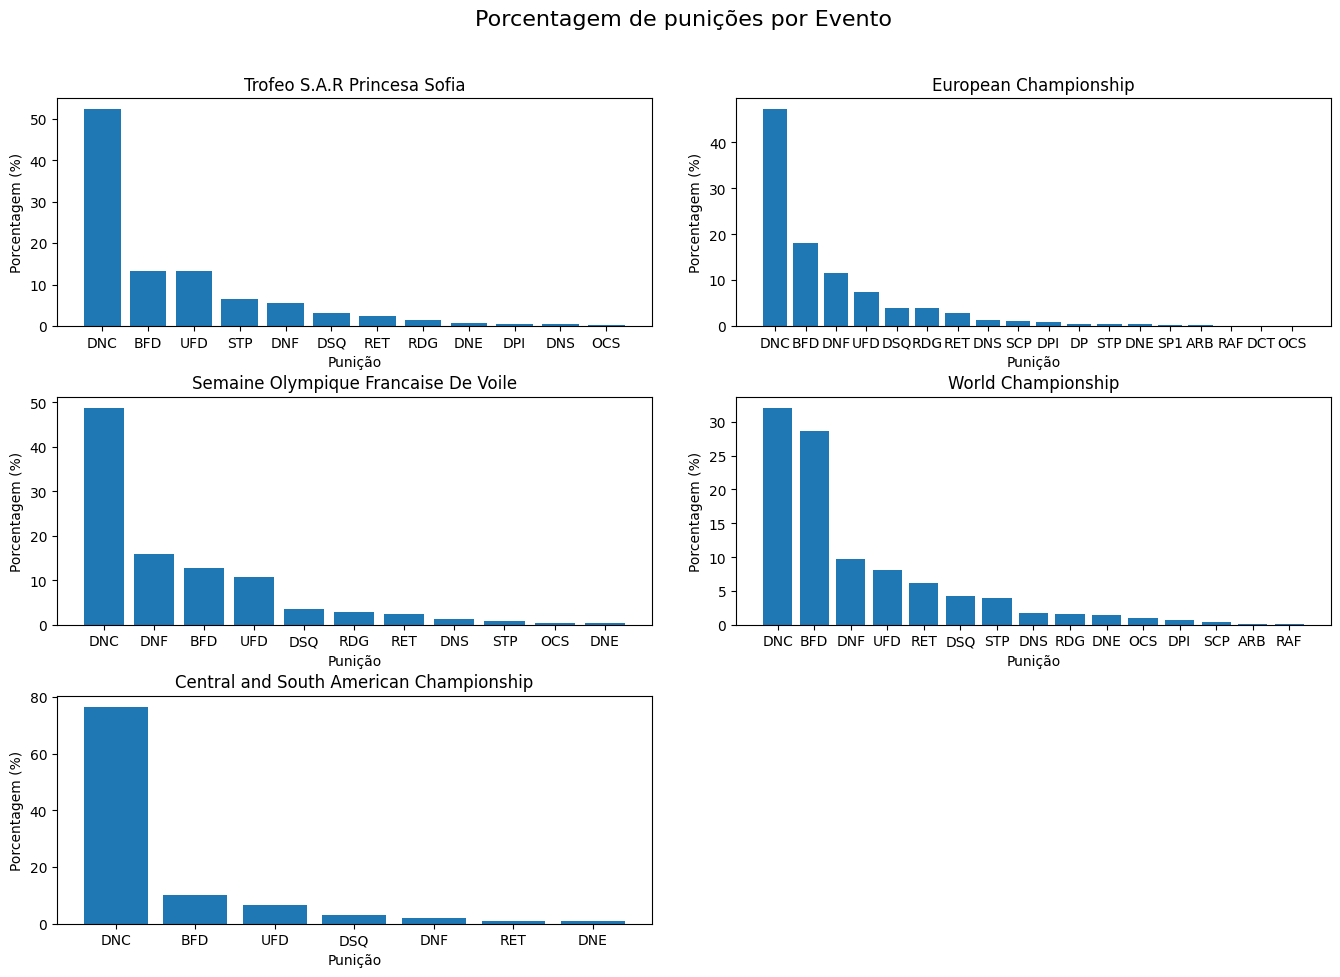

In [35]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14,10))
fig.subplots_adjust(hspace=1)
fig.suptitle('Porcentagem de punições por Evento', fontsize=16)
fig.tight_layout(pad=3.0)
for i, evento in enumerate(eventos):
    ax = axes[i//2, i%2]
    ax.set_title(evento)
    ax.set_xlabel('Punição')
    ax.set_ylabel('Porcentagem (%)')
    ax.bar(npunicoes_por_competicao[npunicoes_por_competicao['Evento'] == evento]['Punição'], 
           npunicoes_por_competicao[npunicoes_por_competicao['Evento'] == evento]['Porcentagem'])
    
# remove last subplot
fig.delaxes(axes[2,1])

plt.show()

### **Competidores com mais punições**

In [36]:
# pegar o numero de regatas que o competidor correu por campeonato
# contar em quantas regatas ele tomou punição
# tirar a média por competidor desse percentual de regatas que ele tomou punição por campeonato

In [37]:
nregatas_por_competidor = df.groupby(['Nome Competidor', 'Nome Competição'])['Nome Competidor'].count().reset_index(name='Número de Regatas')
nregatas_por_competidor.head()

,Nome Competidor,Nome Competição,Número de Regatas
0,ABAY BERKAY,European Championship 2022,9
1,ABAY BERKAY,European Championship 2023,10
2,ABAY BERKAY,Semaine Olympique Francaise De Voile 2022,9
3,ABAY BERKAY,Semaine Olympique Francaise De Voile 2023,10
4,ABAY BERKAY,Trofeo S.A.R Princesa Sofia 2017,10


In [38]:
npunicoes_por_competidor = df.groupby(['Nome Competidor', 'Nome Competição'])['Punição'].count().sort_values(ascending=False).reset_index(name='Número de Punições')
npunicoes_por_competidor.head()

,Nome Competidor,Nome Competição,Número de Punições
0,MICHELE LAURENZA,European Championship 2022,20
1,"BRICE YRIEIX, ALBANE DUBOIS",European Championship 2016,18
2,CHAVDAR ALEKSANDROV,Trofeo S.A.R Princesa Sofia 2023,16
3,THOMAS CROOK,Semaine Olympique Francaise De Voile 2022,16
4,YOUSSEF BEN ALI,Trofeo S.A.R Princesa Sofia 2023,16


In [39]:
nregatas_por_competidor = nregatas_por_competidor.merge(npunicoes_por_competidor, on=['Nome Competidor', 'Nome Competição'])

In [40]:
nregatas_por_competidor['Porcentagem de Punições'] = (nregatas_por_competidor['Número de Punições'] / nregatas_por_competidor['Número de Regatas']) * 100

❗**COMO LER:** Das competições que o competidor $x$ participou, ele foi punido em média em $y\%$ das regatas.

In [41]:
media_punicoes_por_competidor = nregatas_por_competidor.groupby('Nome Competidor')['Porcentagem de Punições'].mean().sort_values(ascending=False).reset_index(name='Média de Punições')
media_punicoes_por_competidor.head()

,Nome Competidor,Média de Punições
0,"CIAN BYRNE, PATRICK CROSBIE",100.0
1,"GWENDAL NAEL, BREWAL NAEL",100.0
2,"EVAN SJOSTEDT, GARRETT BROWN",100.0
3,"AKSELI KESKINEN, RONI PATTERSON",100.0
4,"MARTINSEN NICHOLAS FADLE, MORTENSEN MARTINE ST...",100.0


### **Competidores que mais participaram / menos participaram de competições**

In [42]:
ncompetitions_por_competidor = df.groupby('Nome Competidor')['Nome Competição'].nunique().reset_index(name='Número de Competições').sort_values(by='Número de Competições', ascending=False)
ncompetitions_por_competidor.head(10)

,Nome Competidor,Número de Competições
20,AGATA BARWINSKA,24
1185,"HELENE NAESS, MARIE RONNINGEN",24
2126,MAXIME JONKER,23
2170,MICHON PERNELLE,23
3036,VIKTORIJA ANDRULYTE,23
2997,VASILEIA KARACHALIOU,22
2949,TONCI STIPANOVIC,22
938,FILIP JURISIC,22
3077,WILLIAM DE SMET,22
1826,LUCIA FALASCA,22


In [43]:
df.query('`Nome Competidor` == "AGATA BARWINSKA"')["Classe Vela"].unique()

array(['Ilca 6'], dtype=object)

In [44]:
df.query('`Nome Competidor` == "HELENE NAESS, MARIE RONNINGEN"')["Classe Vela"].unique()

array(['49erFX'], dtype=object)

In [45]:
df.query('`Nome Competidor` == "VASILEIA KARACHALIOU"')["Classe Vela"].unique()

array(['Ilca 6'], dtype=object)

In [46]:
print("O número médio de competições por competidor é: {}".format(ncompetitions_por_competidor['Número de Competições'].mean().round(2)))
print("{} competidores participaram de apenas uma competição".format(len(ncompetitions_por_competidor.query('`Número de Competições` == 1'))))

O número médio de competições por competidor é: 3.66
1227 competidores participaram de apenas uma competição


#### **Hipótese:** competidores que participaram apenas uma competição teriam desistido do esporte por terem obtido um número alto de punições. 

❗ Os competidores que participaram de **apenas uma competição** só foram punidos, em média, em **13.2%** das regatas que participaram.

❗ Os competidores que participaram de **mais de uma competição** foram punidos em média em **7.26%**.

In [47]:
ncompetitions_por_competidor = ncompetitions_por_competidor.merge(media_punicoes_por_competidor, on='Nome Competidor')
ncompetitions_por_competidor.query('`Número de Competições` == 1').sort_values(by='Média de Punições', ascending=False)

,Nome Competidor,Número de Competições,Média de Punições
2143,DANI CARDONA,1,100.0
2549,"JOHANNES NEUMANN, TIL FERNHOLZ",1,100.0
2215,TSOTRAS ANTONIS,1,100.0
3001,"HANNES WESTBERG, TBC TBC",1,100.0
2995,"MEHDI GHARBI, NOUR EL BEJI",1,100.0
...,...,...,...
2484,"TIAGO ALVES, RICARDO ALVES",1,0.0
2489,"MARCO ANESSI PE', FRANCESCO PIETRO TIRA",1,0.0
2493,MARCELO ADOLFO GONZALEZ PONDAL,1,0.0
2496,JIAN SHI,1,0.0


In [48]:
ncompetitions_por_competidor.query('`Número de Competições` == 1').sort_values(by='Média de Punições', ascending=False)["Média de Punições"].mean()

13.24918660583122

In [49]:
ncompetitions_por_competidor.query('`Número de Competições` > 1').sort_values(by='Média de Punições', ascending=False)["Média de Punições"].mean()

7.267771222029377

### **Competidores que mais variaram de classe**

In [50]:
nclasses_por_competidor = df.groupby('Nome Competidor')['Classe Vela'].nunique().reset_index(name='Número de Classes').sort_values(by='Número de Classes', ascending=False)
nclasses_por_competidor.head(10)

,Nome Competidor,Número de Classes
919,FELIPE RONDINA,2
278,ARTURO MITNIK,2
190,ANDREY DE OLIVEIRA GODOY,2
2277,NICK GRAEL,2
2786,STEFANO CAIAFA,2
2066,MATEO VIDAL,2
2453,PIERO CASTANEDA,2
1949,MARIA ASHIDA,2
1504,JUAN GRUNWALDT,2
255,ARIEL ZERPA,2


❗**Os competidores passaram por no máximo 2 classes diferentes**. Vários dos homens que passaram por duas classes diferentes competiram pelo Ilca 6 e Ilca 7

In [51]:
print("O número de competidores que competiram por uma única classe {}".format(len(nclasses_por_competidor.query('`Número de Classes` == 1'))))
print("O número de competidores que já competiram por duas classes diferentes é {}".format(len(nclasses_por_competidor.query('`Número de Classes` == 2'))))

O número de competidores que competiram por uma única classe 3119
O número de competidores que já competiram por duas classes diferentes é 40


In [52]:
df.query('`Nome Competidor` == "MARIA ASHIDA"')["Classe Vela"].unique()

array(['Formula Kite Fem.', 'Ilca 6'], dtype=object)

In [53]:
df.query('`Nome Competidor` == "NICK GRAEL"')["Classe Vela"].unique()

array(['Ilca 7', 'Ilca 6'], dtype=object)